In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import struct
import sys
from model.pgm import *
import time

In [2]:
# Real World Data
# 'd' for double, 'l' for uint
datafile = open('./data/weblogs_unix.uint64','rb')
data = datafile.read(8)
data_len, = struct.unpack('l', data)
data_len = int(data_len)
data=[]
for i in tqdm(range(data_len)):
    data_bin = datafile.read(8)
    data_unix, = struct.unpack('l',data_bin)
    data.append(data_unix)
gaps = np.diff(data)

100%|██████████| 31617494/31617494 [00:22<00:00, 1400295.94it/s]


In [3]:
epsilon_list = range(3,30,3)
Pgm_Index_seg_num = []
Pgm_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    epsilon = epsilon_list[i]
    Pgm_Index = Pgm(epsilon)
    Pgm_Index.learn_index(data)
    Pgm_Index_seg_num.append(Pgm_Index.seg_num)
    Pgm_Index_mae.append(Pgm_Index.mae)
endtime = time.perf_counter()
avg_time = (endtime - starttime) / len(epsilon_list)
avg_time

  0%|          | 0/31617494 [00:00<?, ?it/s]

3 230 1.5329814564051154


  0%|          | 0/31617494 [00:00<?, ?it/s]

6 84 3.1604018332382697


  0%|          | 0/31617494 [00:00<?, ?it/s]

9 50 4.415837415830616


  0%|          | 0/31617494 [00:00<?, ?it/s]

12 35 5.999996995334292


  0%|          | 0/31617494 [00:00<?, ?it/s]

15 27 8.01170940366115


  0%|          | 0/31617494 [00:00<?, ?it/s]

18 23 10.192150459489294


  0%|          | 0/31617494 [00:00<?, ?it/s]

21 19 10.459352819043787


  0%|          | 0/31617494 [00:00<?, ?it/s]

24 17 12.412224827179536


100%|██████████| 31617494/31617494 [05:25<00:00, 97184.24it/s] 

27 16 14.009678692435271


322.44186632045444

In [4]:
Pgm_Dynamic_Index_seg_num = []
Pgm_Dynamic_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    Pgm_Dynamic_Index = PgmDynamic(epsilon_list[i],init_epsilon=range(2,20,2))
    Pgm_Dynamic_Index.learn_index_lookahead(data)
    Pgm_Dynamic_Index_seg_num.append(Pgm_Dynamic_Index.seg_num)
    Pgm_Dynamic_Index_mae.append(Pgm_Dynamic_Index.mae)
endtime = time.perf_counter()
avg_time = (endtime - starttime) / len(epsilon_list)
avg_time

100%|██████████| 31617494/31617494 [05:56<00:00, 88613.59it/s] 


3 197 1.5608946743217536


100%|██████████| 31617494/31617494 [05:33<00:00, 94669.92it/s] 


6 72 2.68094729455788


100%|██████████| 31617494/31617494 [05:24<00:00, 97540.73it/s] 


9 43 3.8834536665050052


100%|██████████| 31617494/31617494 [05:13<00:00, 100846.73it/s]


12 32 5.115464464071694


100%|██████████| 31617494/31617494 [05:12<00:00, 101274.10it/s]


15 27 6.04220195313392


100%|██████████| 31617494/31617494 [05:08<00:00, 102606.64it/s]


18 22 7.373940958129066


100%|██████████| 31617494/31617494 [05:09<00:00, 102062.64it/s]


21 20 7.964551017231157


100%|██████████| 31617494/31617494 [05:09<00:00, 102253.77it/s]


24 19 9.496964844841909


100%|██████████| 31617494/31617494 [05:17<00:00, 99646.82it/s] 


27 18 10.335097841720156


405.2966822634141

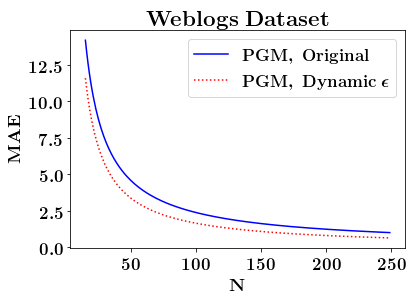

In [5]:
x = np.arange(15,250)
import matplotlib.pylab as pylab
label_size = 18.5
ticks_size = 17
title_size = 22.5
legend_size = 17
params = {'legend.fontsize': legend_size,
          'axes.labelsize': label_size,
          'axes.titlesize': title_size,
          'xtick.labelsize': ticks_size,
          'ytick.labelsize': ticks_size}
pylab.rcParams.update(params)
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = [r'\boldmath']
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]

plt.title('$\mathrm{Weblogs~Dataset}$')
plt.xlabel('$\mathrm{N}$')
plt.ylabel('$\mathrm{MAE}$')
plt.xticks()
plt.yticks()
def func(x,a,b):
    return a * x**b
p1,_ = curve_fit(func,Pgm_Index_seg_num,Pgm_Index_mae)
p2,_ = curve_fit(func,Pgm_Dynamic_Index_seg_num,Pgm_Dynamic_Index_mae)
#p3,_ = curve_fit(func,Pgm_Index_seg_num,Pgm_Index_mae)
#p4,_ = curve_fit(func,Pgm_Dynamic_Index_seg_num,Pgm_Dynamic_Index_mae)
plt.plot(x,p1[0]*x**p1[1],c=colors[0], linestyle=linestyles[0], label='$\mathrm{PGM,~Original}$')
#plt.scatter(Pgm_Index_seg_num, Pgm_Index_mae,c=colors[0],marker=markers[0])
plt.plot(x,p2[0]*x**p2[1],c=colors[1], linestyle=linestyles[1], label='$\mathrm{PGM,~Dynamic~\epsilon}$')
#plt.scatter(Pgm_Dynamic_Index_seg_num, Pgm_Dynamic_Index_mae,c=colors[1],marker=markers[1])
plt.legend()
#plt.savefig("{}.pdf".format("results/PGM/Weblogs_tradeoff_30"), bbox_inches='tight', pad_inches=0)

In [7]:
def calc_AUC(x,y):
    area=0
    for i in range(len(x)-1):
        area += (y[i]+y[i+1])*(x[i+1]-x[i]) / 2 
    return area
AUC1 = calc_AUC(x,p1[0]*x**p1[1])
AUC2 = calc_AUC(x,p2[0]*x**p2[1])
#AUC3 = calc_AUC(x,p3[0]*x**p3[1])
AUC1,AUC2,1-AUC2/AUC1

(651.3692669174231, 470.57353027815907, 0.2775625836553083)